**Bivariate dan Multivariate Visualization**

Sederhananya, bivariate visualization merupakan bentuk visualisasi data untuk menyajikan informasi dari dua variabel dalam suatu dataset. Di lain sisi, multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Keduanya sering digunakan untuk mendeskripsikan hubungan antar variabel dalam suatu dataset.

**Scatter Plot**

Bentuk visualisasi data pertama yang akan kita bahas ialah scatter plot. Ia merupakan bentuk visualisasi data yang digunakan untuk melihat hubungan antara dua atau lebih variabel data kuantitatif. Pada scatter plot sumbu X, Y, atau Z digunakan untuk menampung nilai dari setiap variabel yang akan divisualkan. Titik pada scatter plot merupakan titik temu data dari setiap sumbu yang digunakan.

Untuk membuat scatter plot, kita bisa menggunakan library matplotlib. Ia telah menyediakan sebuah function bernama **scatter()** untuk membantu kita membuat scatter plot secara lebih mudah.

<function matplotlib.pyplot.show(close=None, block=None)>

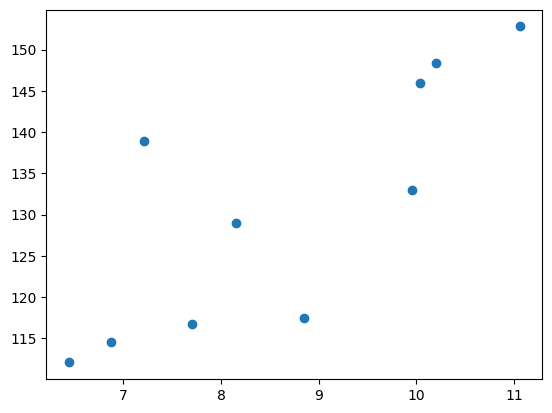

In [1]:
import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.scatter(x=lemon_diameter, y=lemon_weight)
plt.show

Selain menggunakan library matplotlib, kita juga bisa menggunakan function **scatterplot()** yang disediakan oleh library seaborn untuk membuat scatter plot.

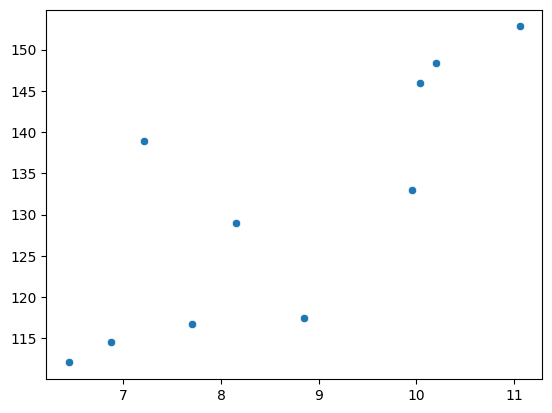

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=lemon_diameter, y=lemon_weight)
plt.show()

Nah, untuk mempermudah dalam melihat korelasi atau hubungan antar variabel, kita bisa menggunakan function **regplot()** yang disediakan oleh library seaborn.

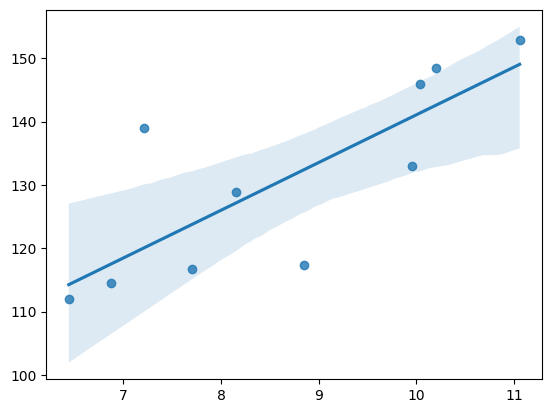

In [3]:
sns.regplot(x=lemon_diameter, y=lemon_weight)
plt.show()

Pada visualisasi data di atas, garis biru menunjukkan garis korelasi dari hasil regression sedangkan pita di sekitar garis tersebut menunjukkan confidence level dari hasil regression tersebut. Semakin kecil bentuk pita yang dihasilkan menandakan tingkat confidence level yang tinggi.

Selain itu, kita juga bisa membuat scatter plot untuk menggambarkan hubungan antar tiga variabel. Namun, untuk kebanyakan kasus kita harus menghindari penggunaan plot tiga dimensi karena sulit diamati dan dipahami.



**Line Chart**

Bentuk visualisasi data yang selanjutnya akan kita bahas ialah line chart. Ia merupakan bentuk grafik yang umum digunakan untuk menggambarkan tren nilai dari suatu variabel terhadap variabel lain.

Kita bisa membuat line chart menggunakan function **plot()** yang disediakan oleh matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

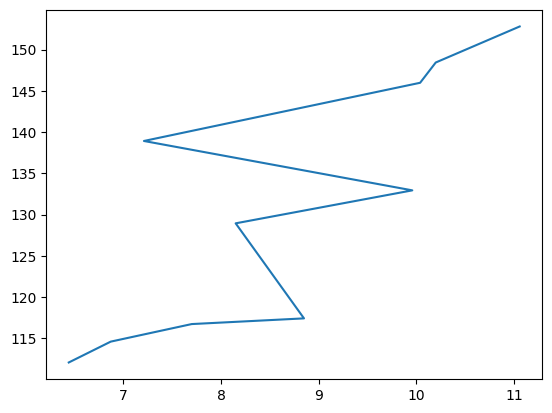

In [4]:
import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.plot(lemon_diameter, lemon_weight)
plt.show

Bentuk visualisasi data ini umumnya digunakan untuk melihat trend dari data berbentuk time series (data yang direkam dalam interval waktu yang konsisten). Berikut contoh kode untuk menampilkan plot harga saham Bank Central Asia dengan kode saham BBCA.



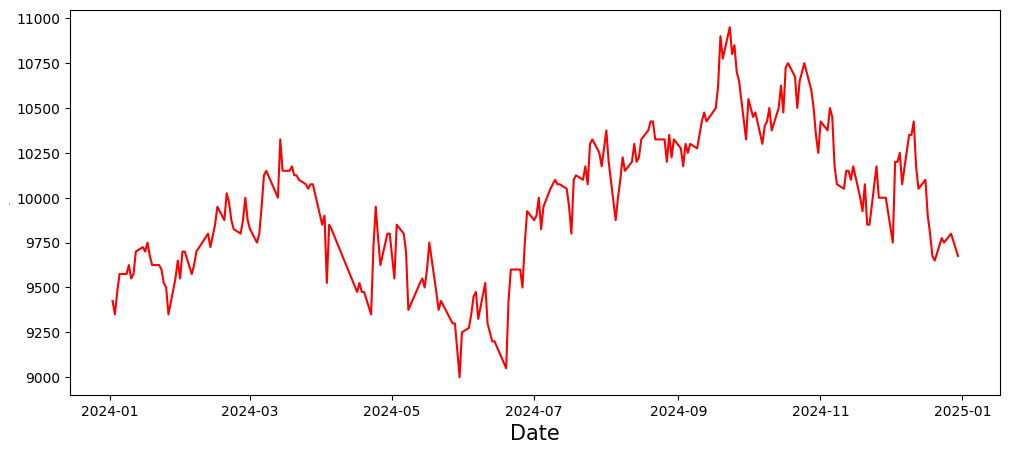

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

url = 'https://query1.finance.yahoo.com/v8/finance/chart/BBCA.JK?events=capitalGain%7Cdiv%7Csplit&formatted=true&includeAdjustedClose=true&interval=1d&period1=1704165596&period2=1735689600&symbol=BBCA&userYfid=true&lang=en-US&region=US'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Ambil data dari URL
response = requests.get(url, headers=headers)

# Konversi data JSON menjadi DataFrame
data = response.json()

# Eksraksi data dari JSON
timestamps = data['chart']['result'][0]['timestamp']
indicators = data['chart']['result'][0]['indicators']['quote'][0]

# Membuat DataFrame
df = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='s'),
    'open': indicators['open'],
    'high': indicators['high'],
    'low': indicators['low'],
    'close': indicators['close'],
    'volume': indicators['volume'],
})

plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['close'], color='red')
plt.xlabel('Date', size=15)
plt.ylabel('Price', size=15)
plt.show()

Agar tampilan visualnya enak dilihat, pada contoh ini, kita mengatur ukuran plot-nya dengan argumen **figsize** pada function **figure()**. Berikut merupakan visualisasi data yang dihasilkan.

**Clustered Bar Chart**

Clustered bar chart merupakan bentuk modifikasi dari bar chart yang sebelumnya kita kenal dengan menambahkan variabel kategoris lain. Modifikasi ini memungkinkan untuk melihat distribusi serta hubungan antar dua atau lebih variabel kategoris.

Untuk membuat clustered bar chart, kita bisa menggunakan parameter **hue** pada function **barplot(**) yang disediakan oleh library seaborn. Berikut contoh kode untuk membuatnya.

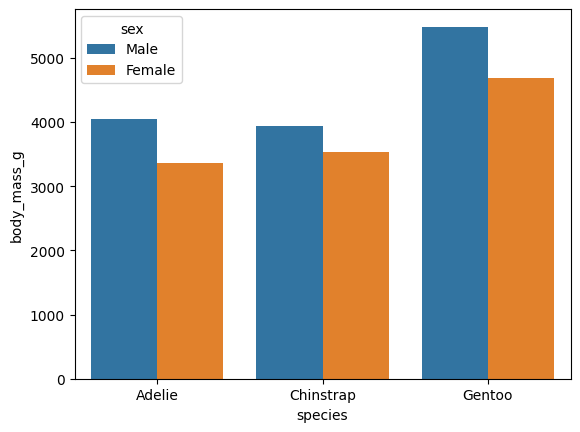

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", errorbar=None)
plt.show()

**Menggunakan Komponen Visual Tambahan**

Kita juga bisa memodifikasi scatter plot menggunakan shape atau color yang berbeda guna menampilkan hubungan lebih dari dua variabel data. Seperti pada contoh berikut.

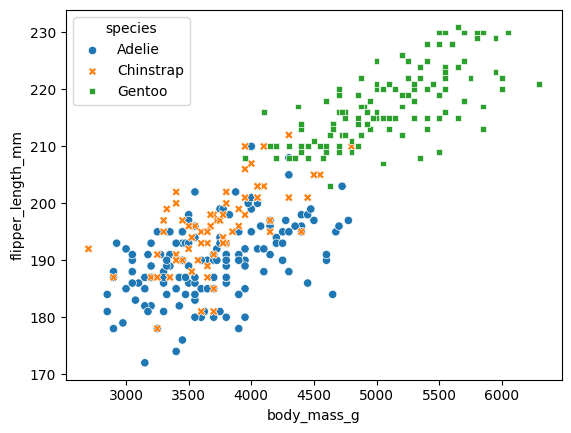

In [24]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()

Pada contoh kode di atas, kita menampilkan hubungan antara berat badan dan flipper length dari setiap spesies penguin yang dibedakan menggunakan warna **(hue)** serta bentuk **(style)**. Berikut hasil visualisasi data dari kode tersebut.

Nah, itulah berbagai pilihan bentuk visualisasi dan teknik yang dapat Anda gunakan untuk merepresentasikan dua atau lebih variabel dalam suatu dataset.